##  [quiz] 2021년 11월 1일~ 2022년 1월 27일 코로나 확진자를 학습하고 이후 확진자수 예측하라

In [5]:
#3일 동안의 확진자 수 추이를 보고 다음 날의 확진자 수를 예측
#따라서 인공지능은 3일 동안의 확진자 수를 보고 다음 날의 확진자 수가 어떻게 되었는지 학습
#만약 100일 동안의 확진자 수가 있다면 가장 먼저 1, 2, 3일차의 확진자 수가 어떻게 변하였는지 살펴보고 4일차의 확진자 수를 학습한다
#그리고 2, 3, 4일차의 확진자 수가 어떻게 변하였는지 살펴보고 5일차의 확진자 수를 학습한다
#이러한 방식으로 계속 학습하여 97, 98, 99일차의 확진자 수로 100일차의 확진자 수를 학습한다
#연속된 데이터의 형태에서 그 패턴을 찾아내는 순환 신경망(RNN) 방식으로, RNN의 기본적인 형태를 설계하고 학습시켜 본다


# RNN-코로나19 확진자수 예측

#### 필요한 라이브러리 임포트

In [6]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



#### 코로나 데이터 가져오기

In [ ]:
'''import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split'''
# Step 1: Handle Missing Values
'''covid_19['new_patient'].fillna(0, inplace=True)'''  # Assuming NaNs represent zero new patients
# Step 2: Feature Scaling
'''scaler = MinMaxScaler()
covid_19[['deathCnt', 'decideCnt', 'new_patient']] = scaler.fit_transform(covid_19[['deathCnt', 'decideCnt', 'new_patient']])'''
# Step 3: Convert Time Series to Sequences
# Assuming you want to predict 'decideCnt' based on previous 'new_patient' values
# You may need to adjust the sequence length and target column based on your requirements
'''sequence_length = 10
X, y = [], []
for i in range(len(covid_19) - sequence_length):
    X.append(covid_19.iloc[i:(i + sequence_length)][['deathCnt', 'decideCnt', 'new_patient']].values)
    y.append(covid_19.iloc[i + sequence_length]['decideCnt'])
X = np.array(X)
y = np.array(y)'''
# Step 6: Split Data
''''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)'''
# Now you can proceed to train your RNN model using X_train, y_train
# and evaluate it using X_test, y_test
'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense'''
# Define the RNN model
'''model = Sequential()'''
# Add the SimpleRNN layer
# Adjust the number of units and input_shape according to your data and requirements
'''model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))'''
# Add the output layer
# Assuming you want to predict a single value (decideCnt)
'''model.add(Dense(units=1))'''
# Compile the model
# Adjust the loss function and optimizer according to your task
'''model.compile(optimizer='adam', loss='mean_squared_error')'''
# Print the summary of the model
'''model.summary()'''

In [8]:
covid_19 = pd.read_csv('./covid_2021101_20220127.csv')
covid_19.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
covid_19.isna().sum()
covid_19['new_patient'].fillna(0, inplace=True)
covid_19.isna().sum()

deathCnt       0
createDate     0
decideCnt      0
new_patient    0
dtype: int64

In [10]:
covid_19['new_patient'].max(), covid_19['new_patient'].min(), 

(14515.0, 0.0)

In [11]:
scaler = MinMaxScaler()
covid_19[['deathCnt', 'decideCnt', 'new_patient']] = scaler.fit_transform(covid_19[['deathCnt', 'decideCnt', 'new_patient']])

In [12]:
covid_19.iloc[0:(0 + 10)][['deathCnt', 'decideCnt', 'new_patient']].values

array([[0.        , 0.        , 0.        ],
       [0.00421496, 0.00386277, 0.10940406],
       [0.0089568 , 0.01035018, 0.18374096],
       [0.01527924, 0.01638758, 0.17099552],
       [0.02054795, 0.02208687, 0.16141922],
       [0.02581665, 0.02755021, 0.15473648],
       [0.02871444, 0.03296246, 0.1532897 ],
       [0.03213909, 0.03722902, 0.12084051],
       [0.03688093, 0.04140558, 0.11829142],
       [0.04056902, 0.04730433, 0.16706855]])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [28]:
sequence_length = 3
X, y = [], []
for i in range(len(covid_19) - sequence_length):
    X.append(covid_19.iloc[i:(i + sequence_length)][['deathCnt', 'decideCnt', 'new_patient']].values)
    y.append(covid_19.iloc[i + sequence_length]['decideCnt'])
X = np.array(X)
y = np.array(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [32]:
X_train, len(X_train), X_train[0]

(array([[[0.        , 0.        , 0.        ],
         [0.00421496, 0.00386277, 0.10940406],
         [0.0089568 , 0.01035018, 0.18374096]],
 
        [[0.00421496, 0.00386277, 0.10940406],
         [0.0089568 , 0.01035018, 0.18374096],
         [0.01527924, 0.01638758, 0.17099552]],
 
        [[0.0089568 , 0.01035018, 0.18374096],
         [0.01527924, 0.01638758, 0.17099552],
         [0.02054795, 0.02208687, 0.16141922]],
 
        [[0.01527924, 0.01638758, 0.17099552],
         [0.02054795, 0.02208687, 0.16141922],
         [0.02581665, 0.02755021, 0.15473648]],
 
        [[0.02054795, 0.02208687, 0.16141922],
         [0.02581665, 0.02755021, 0.15473648],
         [0.02871444, 0.03296246, 0.1532897 ]],
 
        [[0.02581665, 0.02755021, 0.15473648],
         [0.02871444, 0.03296246, 0.1532897 ],
         [0.03213909, 0.03722902, 0.12084051]],
 
        [[0.02871444, 0.03296246, 0.1532897 ],
         [0.03213909, 0.03722902, 0.12084051],
         [0.03688093, 0.04140558, 0.118291

In [17]:
X_train.shape

(68, 3, 3)

In [18]:
model = Sequential()
model.add(SimpleRNN(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

In [19]:
model.compile(optimizer='adam', loss='mse', metrics='mae')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10501 (41.02 KB)
Trainable params: 10501 (41.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=100)

Epoch 1/100




3/3 [==============================] - 2s 132ms/step - loss: 0.0637 - mae: 0.1875 - val_loss: 0.0072 - val_mae: 0.0811
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0227 - mae: 0.1430 - val_loss: 0.0338 - val_mae: 0.1812
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0151 - mae: 0.1128 - val_loss: 0.0030 - val_mae: 0.0379
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0012 - mae: 0.0254 - val_loss: 0.0311 - val_mae: 0.1640
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0102 - mae: 0.0934 - val_loss: 0.0136 - val_mae: 0.0983
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0035 - mae: 0.0514 - val_loss: 0.0074 - val_mae: 0.0788
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0030 - mae: 0.0366 - val_loss: 0.0183 - val_mae: 0.1278
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0053 - mae: 0.0549 - val_l

In [21]:
# Step 6: 2022년 1월 28일 코로나 확진자 수 예측
last_sequence = covid_19.iloc[-sequence_length:][['deathCnt', 'decideCnt', 'new_patient']].values
last_sequence = np.expand_dims(last_sequence, axis=0)
predicted_value = model.predict(last_sequence)
# predicted_value = scaler.inverse_transform(predicted_value)  # 정규화된 값을 원래 범위로 변환
## 원래의 값 = (정규화된 값 * (max - min)) + min
predicted_value = (predicted_value * (14515.0 - 0.0)) + 0.0
print("2022년 1월 28일 코로나 확진자 수 예측:", predicted_value)

1/1 [==============================] - 0s 167ms/step
2022년 1월 28일 코로나 확진자 수 예측: [[12979.332]]


In [22]:
df = pd.DataFrame(hist.history)
df

,loss,mae,val_loss,val_mae
0,0.063666,0.187509,0.007181,0.081099
1,0.022689,0.143044,0.033765,0.181249
2,0.015142,0.112800,0.003020,0.037941
3,0.001154,0.025377,0.031084,0.163994
4,0.010167,0.093359,0.013602,0.098266
...,...,...,...,...
95,0.000018,0.003401,0.002453,0.035207
96,0.000019,0.003545,0.002527,0.036124
97,0.000018,0.003434,0.002593,0.036981
98,0.000018,0.003370,0.002530,0.036380


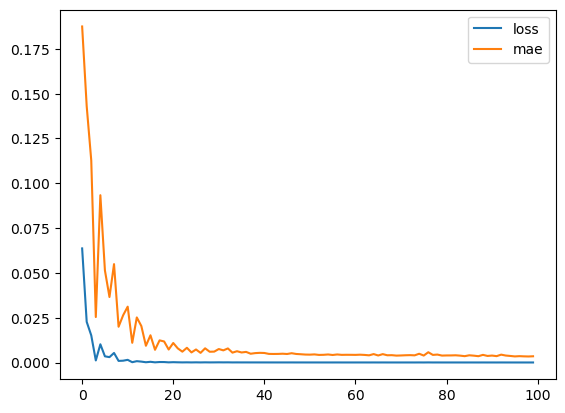

In [23]:

plt.plot(df.loss, label = 'loss')
plt.plot(df.mae, label='mae')
plt.legend()
plt.show()

#### 데이터 정규화 및 분류하기

#### 데이터 형태 변경하기

### 인공지능 모델 만들기

#### 모델 학습

#### 결과 시각화